In [1]:
%matplotlib inline

In [2]:
import iris
import iris.quickplot as qplt
import iris.plot as iplt
from iris.fileformats import netcdf as inc
from iris.coords import DimCoord, AuxCoord
from iris.cube import Cube
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from skimage.measure import EllipseModel

In [4]:
from osgeo import osr
import pandas as pd
import geopandas as geopd
from shapely.geometry import Point

In [5]:
from nonstationary_cov import cube_covariance as cube_cov
from nonstationary_cov import (
    cube_covariance_nonstationary_stich as cube_cov_stich,
)
from nonstationary_cov import cube_io_10x10 as cube_io_10

In [6]:
plt.rcParams["figure.figsize"] = [15, 10]

In [7]:
cube_matern_dist = iris.load("../test_data/Atlantic_Ocean_07.nc")
print(repr(cube_matern_dist))

[<iris 'Cube' of standard_deviation / (K) (latitude: 120; longitude: 120)>,
<iris 'Cube' of Ly / (km) (latitude: 120; longitude: 120)>,
<iris 'Cube' of qc_code / (1) (latitude: 120; longitude: 120)>,
<iris 'Cube' of number_of_iterations / (1) (latitude: 120; longitude: 120)>,
<iris 'Cube' of Lx / (km) (latitude: 120; longitude: 120)>,
<iris 'Cube' of theta / (radians) (latitude: 120; longitude: 120)>]


In [8]:
Lx = cube_matern_dist.extract("Lx")[0][50:70, 50:70]
Ly = cube_matern_dist.extract("Ly")[0][50:70, 50:70]
theta = cube_matern_dist.extract("theta")[0][50:70, 50:70]
sigma = cube_matern_dist.extract("standard_deviation")[0][50:70, 50:70]

In [9]:
print(repr(Lx))
print(repr(Ly))
print(repr(theta))
print(repr(sigma))

<iris 'Cube' of Lx / (km) (latitude: 20; longitude: 20)>
<iris 'Cube' of Ly / (km) (latitude: 20; longitude: 20)>
<iris 'Cube' of theta / (radians) (latitude: 20; longitude: 20)>
<iris 'Cube' of standard_deviation / (K) (latitude: 20; longitude: 20)>


In [10]:
print(Lx)
v = float(Lx.coord("v_shape").points)
delta_x_method = "Modified_Met_Office"
print(v)
print(delta_x_method)

Lx / (km)                              (latitude: 20; longitude: 20)
    Dimension coordinates:
        latitude                                x              -
        longitude                               -              x
    Scalar coordinates:
        fitting_model                  ps2006_kks2011_ani_r_pd
        month_number                   7
        supercategory_of_fitting_model 3_param_matern_pd
        time                           2002-07-03 00:00:00
        v_shape                        0.5
        year                           2002
    Attributes:
        Conventions                    'CF-1.7'
0.5
Modified_Met_Office


/tmp/ipykernel_3838645/1903522156.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(Lx.coord('v_shape').points)


In [11]:
print(Lx.coord("latitude"))
print(Lx.coord("longitude"))

DimCoord :  latitude / (degrees)
    points: [-9.875, -8.875, ...,  8.125,  9.125]
    shape: (20,)
    dtype: float64
    standard_name: 'latitude'
    long_name: 'latitude'
    var_name: 'latitude'
DimCoord :  longitude / (degrees)
    points: [310.125, 311.125, ..., 328.125, 329.125]
    bounds: [
        [309.625, 310.625],
        [310.625, 311.625],
        ...,
        [327.625, 328.625],
        [328.625, 329.625]]
    shape: (20,)  bounds(20, 2)
    dtype: float64
    standard_name: 'longitude'
    long_name: 'longitude'
    var_name: 'longitude'


In [12]:
hfix_cpd = True
stich_hfix = cube_cov_stich.CovarianceCube_PreStichedLocalEstimates(
    Lx,
    Ly,
    theta,
    sigma,
    v=v,
    delta_x_method=delta_x_method,
    check_positive_definite=hfix_cpd,
)

Overhead processing start:  2025-01-23 15:05:50
Masked pixels detected in input files
Creating dummy arrays
Compressing (masked) array to 1D
Overhead processing ended:  2025-01-23 15:05:50
Time ellipsed:  0:00:00.079275
Covariance processing start:  2025-01-23 15:05:50
2025-01-23 15:05:50: Row 0/261; current & peak mem: 1.1336450576782227 1.2599802017211914 MB; n_jobs = 1
2025-01-23 15:05:50: Row 1/261; current & peak mem: 1.1345577239990234 1.2599802017211914 MB; n_jobs = 1
2025-01-23 15:05:51: Row 2/261; current & peak mem: 1.1349372863769531 1.2599802017211914 MB; n_jobs = 1
2025-01-23 15:05:51: Row 3/261; current & peak mem: 1.135416030883789 1.2599802017211914 MB; n_jobs = 1
2025-01-23 15:05:51: Row 4/261; current & peak mem: 1.1362028121948242 1.2599802017211914 MB; n_jobs = 1
2025-01-23 15:05:52: Row 5/261; current & peak mem: 1.1367368698120117 1.2599802017211914 MB; n_jobs = 1
2025-01-23 15:05:52: Row 6/261; current & peak mem: 1.1371793746948242 1.2599802017211914 MB; n_jobs 

In [13]:
print(stich_hfix)

In [14]:
no_hfix_cpd = False
stich_no_hfix = cube_cov_stich.CovarianceCube_PreStichedLocalEstimates(
    Lx,
    Ly,
    theta,
    sigma,
    v=v,
    delta_x_method=delta_x_method,
    check_positive_definite=no_hfix_cpd,
)

Overhead processing start:  2025-01-23 15:06:53
Masked pixels detected in input files
Creating dummy arrays
Compressing (masked) array to 1D
Overhead processing ended:  2025-01-23 15:06:53
Time ellipsed:  0:00:00.006190
Covariance processing start:  2025-01-23 15:06:53
2025-01-23 15:06:53: Row 0/261; current & peak mem: 2.809490203857422 2.819340705871582 MB; n_jobs = 1


2025-01-23 15:06:53: Row 1/261; current & peak mem: 2.8087406158447266 2.821735382080078 MB; n_jobs = 1
2025-01-23 15:06:54: Row 2/261; current & peak mem: 2.809406280517578 2.821735382080078 MB; n_jobs = 1
2025-01-23 15:06:55: Row 3/261; current & peak mem: 2.8099260330200195 2.821735382080078 MB; n_jobs = 1
2025-01-23 15:06:55: Row 4/261; current & peak mem: 2.8102502822875977 2.821735382080078 MB; n_jobs = 1
2025-01-23 15:06:56: Row 5/261; current & peak mem: 2.810431480407715 2.821735382080078 MB; n_jobs = 1
2025-01-23 15:06:56: Row 6/261; current & peak mem: 2.8106212615966797 2.821735382080078 MB; n_jobs = 1
2025-01-23 15:06:57: Row 7/261; current & peak mem: 2.810957908630371 2.821735382080078 MB; n_jobs = 1
2025-01-23 15:06:58: Row 8/261; current & peak mem: 2.811429977416992 2.8218307495117188 MB; n_jobs = 1
2025-01-23 15:06:59: Row 9/261; current & peak mem: 2.812108039855957 2.8218307495117188 MB; n_jobs = 1
2025-01-23 15:06:59: Row 10/261; current & peak mem: 2.812224388122

In [15]:
print(stich_no_hfix)

In [16]:
xy = 150
cor_with_point_cube0 = stich_hfix.remap_one_point_2_map(
    stich_hfix.cor_ns[xy, :].copy(), cube_name="correlation", cube_unit="1"
)
cor_with_point_cube1 = stich_no_hfix.remap_one_point_2_map(
    stich_no_hfix.cor_ns[xy, :].copy(), cube_name="correlation", cube_unit="1"
)

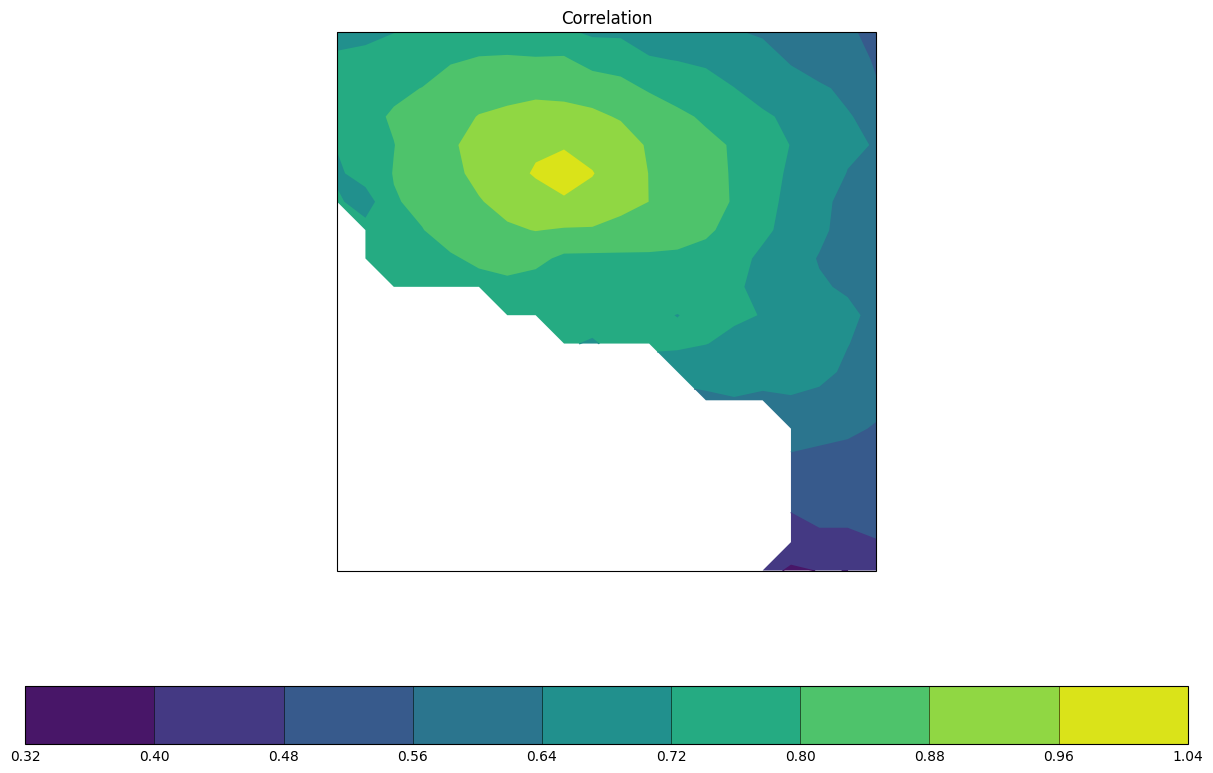

In [17]:
qplt.contourf(cor_with_point_cube0)

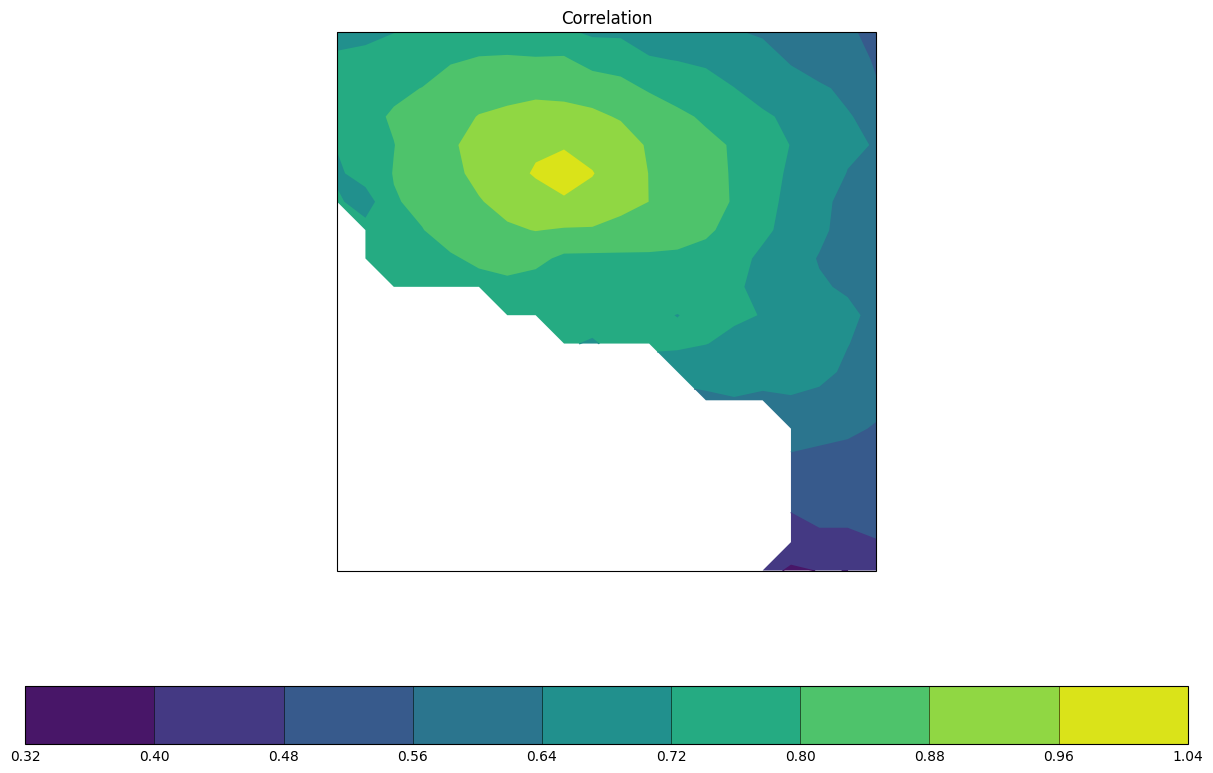

In [18]:
qplt.contourf(cor_with_point_cube1)

In [19]:
stich = stich_hfix
print(hfix_cpd)
print(stich.check_positive_definite)
print(int(stich.check_positive_definite))
covariance_file = "test_hfix.nc"

True
True
1


In [20]:
stich_cov = stich.cov_ns
stich_cor = stich.cor_ns
# Create dummy row and column coordinates for covariance and correlation matrix
nrows = stich.cov_ns.shape[0]
dim_row = DimCoord(np.arange(nrows, dtype=int), long_name="dim_0", units="1")
dim_col = DimCoord(np.arange(nrows, dtype=int), long_name="dim_1", units="1")
# v_coord as an Aux Coord stating the Matern parameter
v_coord = AuxCoord(v, long_name="matern_nu")
det_coord = AuxCoord(stich.cov_det, long_name="covariance_determinant")
eig_coord = AuxCoord(stich.cov_eig[-1], long_name="smallest_eigenvalue")
pd_check_coord = AuxCoord(
    int(stich.check_positive_definite),
    long_name="positive_semidefinite_check_enabled",
)
# Define the iris cube
cov_cube = Cube(stich_cov, dim_coords_and_dims=[(dim_row, 0), (dim_col, 1)])
cor_cube = Cube(stich_cor, dim_coords_and_dims=[(dim_row, 0), (dim_col, 1)])
cov_cube.data = cov_cube.data.astype(np.float32)
cor_cube.data = cor_cube.data.astype(np.float32)
cov_cube.add_aux_coord(v_coord)
cor_cube.add_aux_coord(v_coord)
cov_cube.add_aux_coord(det_coord)
cor_cube.add_aux_coord(det_coord)
cov_cube.add_aux_coord(eig_coord)
cor_cube.add_aux_coord(eig_coord)
cov_cube.add_aux_coord(pd_check_coord)
cor_cube.add_aux_coord(pd_check_coord)
cov_cube.units = "K**2"
cor_cube.units = "1"
cov_cube.rename("covariance")
cor_cube.rename("correlation")

## Write to file
cov_list = iris.cube.CubeList()
cov_list.append(cov_cube)
cov_list.append(cor_cube)
print("Writing covariance file: ", covariance_file)
inc.save(cov_list, covariance_file)
##

Writing covariance file:  test_hfix.nc


/noc/users/stchan/py_env/anaconda-python3_3.11.3-GCCcore-12.3.0_gis_and_iris/lib/python3.11/site-packages/iris/fileformats/netcdf/saver.py:2670: IrisDeprecation: Saving to netcdf with legacy-style attribute handling for backwards compatibility.
This mode is deprecated since Iris 3.8, and will eventually be removed.
Please consider enabling the new split-attributes handling mode, by setting 'iris.FUTURE.save_split_attrs = True'.
  warn_deprecated(message)


In [21]:
stich = stich_no_hfix
print(no_hfix_cpd)
print(stich.check_positive_definite)
print(int(stich.check_positive_definite))
covariance_file = "test_no_hfix.nc"

False
False
0


In [22]:
stich_cov = stich.cov_ns
stich_cor = stich.cor_ns
# Create dummy row and column coordinates for covariance and correlation matrix
nrows = stich.cov_ns.shape[0]
dim_row = DimCoord(np.arange(nrows, dtype=int), long_name="dim_0", units="1")
dim_col = DimCoord(np.arange(nrows, dtype=int), long_name="dim_1", units="1")
# v_coord as an Aux Coord stating the Matern parameter
v_coord = AuxCoord(v, long_name="matern_nu")
det_coord = AuxCoord(stich.cov_det, long_name="covariance_determinant")
eig_coord = AuxCoord(stich.cov_eig[-1], long_name="smallest_eigenvalue")
pd_check_coord = AuxCoord(
    int(stich.check_positive_definite),
    long_name="positive_semidefinite_check_enabled",
)
# Define the iris cube
cov_cube = Cube(stich_cov, dim_coords_and_dims=[(dim_row, 0), (dim_col, 1)])
cor_cube = Cube(stich_cor, dim_coords_and_dims=[(dim_row, 0), (dim_col, 1)])
cov_cube.data = cov_cube.data.astype(np.float32)
cor_cube.data = cor_cube.data.astype(np.float32)
cov_cube.add_aux_coord(v_coord)
cor_cube.add_aux_coord(v_coord)
cov_cube.add_aux_coord(det_coord)
cor_cube.add_aux_coord(det_coord)
cov_cube.add_aux_coord(eig_coord)
cor_cube.add_aux_coord(eig_coord)
cov_cube.add_aux_coord(pd_check_coord)
cor_cube.add_aux_coord(pd_check_coord)
cov_cube.units = "K**2"
cor_cube.units = "1"
cov_cube.rename("covariance")
cor_cube.rename("correlation")

## Write to file
cov_list = iris.cube.CubeList()
cov_list.append(cov_cube)
cov_list.append(cor_cube)
print("Writing covariance file: ", covariance_file)
inc.save(cov_list, covariance_file)
##

Writing covariance file:  test_no_hfix.nc
